## Data Analysis Steps
1. Question
2. Wrangle -> Gather -> Assess -> Clean
3. Explore -> Analyses -> Visualizations and Models -> Patterns -> Feature Engineering (Remove outliers)
4. Draw Conclusions -> Machine Learning and Inferential Statistics
5. Communicate -> Reports, Slides, Blog Posts, Presentation

In [103]:
#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data#
import pandas as pd
df = pd.read_csv('cancer_data.csv')

In [38]:
#df.to_csv('cancer_data_edited.csv', index=False)

Questions:
1. Is there a correlation between texture and type of diagnosis?
2. Correlation between radius and type of diagnosis?

### Assess

In [40]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(569, 32)

In [43]:
df.dtypes

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_SE                 float64
texture_SE                float64
perimeter_SE              float64
area_SE                   float64
smoothness_SE             float64
compactness_SE            float64
concavity_SE              float64
concave_points_SE         float64
symmetry_SE               float64
fractal_dimension_SE      float64
radius_max                float64
texture_max               float64
perimeter_max             float64
area_max                  float64
smoothness_max            float64
compactness_max           float64
concavity_max             float64
concave_points

In [44]:
# although the datatype for diagnosis appears to be object, further
# investigation shows it's a string
type(df['diagnosis'][0])

str

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                        569 non-null int64
diagnosis                 569 non-null object
radius_mean               569 non-null float64
texture_mean              548 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           521 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave_points_mean       569 non-null float64
symmetry_mean             504 non-null float64
fractal_dimension_mean    569 non-null float64
radius_SE                 569 non-null float64
texture_SE                548 non-null float64
perimeter_SE              569 non-null float64
area_SE                   569 non-null float64
smoothness_SE             521 non-null float64
compactness_SE            569 non-null float64
concavity_SE              569 non-null float64
conca

In [45]:
# this returns the number of unique values in each column
df.nunique()

id                        562
diagnosis                   2
radius_mean               451
texture_mean              459
perimeter_mean            516
area_mean                 532
smoothness_mean           434
compactness_mean          530
concavity_mean            530
concave_points_mean       536
symmetry_mean             394
fractal_dimension_mean    494
radius_SE                 535
texture_SE                499
perimeter_SE              526
area_SE                   523
smoothness_SE             495
compactness_SE            534
concavity_SE              526
concave_points_SE         500
symmetry_SE               438
fractal_dimension_SE      539
radius_max                452
texture_max               490
perimeter_max             510
area_max                  537
smoothness_max            378
compactness_max           523
concavity_max             532
concave_points_max        485
symmetry_max              449
fractal_dimension_max     530
dtype: int64

In [42]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.690000e+02,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,...,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000
mean,3.051467e+07,14.113021,19.293431,91.877909,653.288576,0.096087,0.104536,0.088620,0.048837,0.181091,...,16.261896,25.660803,107.211142,880.163796,0.132090,0.254557,0.271681,0.114377,0.288856,0.084012
std,1.250417e+08,3.506148,4.327287,24.162787,349.476899,0.013924,0.052674,0.079011,0.038578,0.027899,...,4.841175,6.202916,33.621975,570.498628,0.022685,0.158042,0.208298,0.065760,0.062520,0.018151
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691040e+05,11.700000,16.167500,75.170000,420.300000,0.086050,0.065260,0.029560,0.020360,0.161800,...,13.010000,21.017500,84.110000,515.300000,0.116600,0.146000,0.112500,0.064020,0.247650,0.071270
50%,9.060240e+05,13.370000,18.785000,86.340000,551.100000,0.095780,0.094530,0.061550,0.033700,0.178950,...,14.970000,25.370000,97.650000,686.500000,0.131200,0.211900,0.226700,0.100100,0.280650,0.080040
75%,8.910251e+06,15.780000,21.825000,103.800000,782.700000,0.104800,0.130500,0.131900,0.074040,0.195750,...,18.760000,29.675000,125.100000,1070.000000,0.145000,0.339900,0.385300,0.162500,0.317525,0.092110
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Indexing and Selecting Data in Pandas

In [51]:
# select all the columns from 'id' to the last mean column
df_means = df.loc[:,'id':'fractal_dimension_mean']

In [55]:
df_means.shape

(569, 12)

In [53]:
# repeat the step above using index numbers
df_means = df.iloc[:,:12]

In [56]:
df_means.shape

(569, 12)

### Selecting Multiple Ranges in Pandas
https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe

In [57]:
import numpy as np
# create the standard errors dataframe
df_sd = df.iloc[:, np.r_[1:10, 15, 17, 28]]
df_sd.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,area_SE,compactness_SE,concavity_max
0,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,153.40,0.04904,0.7119
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,74.08,0.01308,0.2416
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,94.03,0.04006,0.4504
3,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,27.23,0.07458,0.6869
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,94.44,0.02461,0.4000


### Cleaning

In [58]:
# pd.to_datetime(df['column'])

In [93]:
# cleaning on df_means dataframe
df_means.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 568
Data columns (total 12 columns):
id                   564 non-null int64
diagnosis            564 non-null object
radius               564 non-null float64
texture              543 non-null float64
perimeter            564 non-null float64
area                 564 non-null float64
smoothness           516 non-null float64
compactness          564 non-null float64
concavity            564 non-null float64
concave_points       564 non-null float64
symmetry             499 non-null float64
fractal_dimension    564 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 57.3+ KB


In [95]:
# use means to fill in missing values
df_means.fillna(df_means.mean(), inplace=True)

# confirm your correction with info()
df_means.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 568
Data columns (total 12 columns):
id                   564 non-null int64
diagnosis            564 non-null object
radius               564 non-null float64
texture              564 non-null float64
perimeter            564 non-null float64
area                 564 non-null float64
smoothness           564 non-null float64
compactness          564 non-null float64
concavity            564 non-null float64
concave_points       564 non-null float64
symmetry             564 non-null float64
fractal_dimension    564 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 57.3+ KB


In [96]:
sum(df_means.duplicated())

0

In [97]:
df_means.drop_duplicates(inplace=True)

In [98]:
sum(df_means.duplicated())

0

## Renaming Columns


In [99]:
# remove "_mean" from column names
def remove_means(cols):
    if '_mean' in cols:
        return cols[:-5]  # exclude last 6 characters
    else:
        return cols

In [100]:
s = pd.Series(df_means.columns)
df_means.columns  = s.apply(remove_means)

In [101]:
df_means.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.275801,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096097,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


In [102]:
df_means.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 568
Data columns (total 12 columns):
id                   564 non-null int64
diagnosis            564 non-null object
radius               564 non-null float64
texture              564 non-null float64
perimeter            564 non-null float64
area                 564 non-null float64
smoothness           564 non-null float64
compactness          564 non-null float64
concavity            564 non-null float64
concave_points       564 non-null float64
symmetry             564 non-null float64
fractal_dimension    564 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 57.3+ KB


### EXPLORE Plotting

In [104]:
% matplotlib inline

UsageError: Line magic function `%` not found.


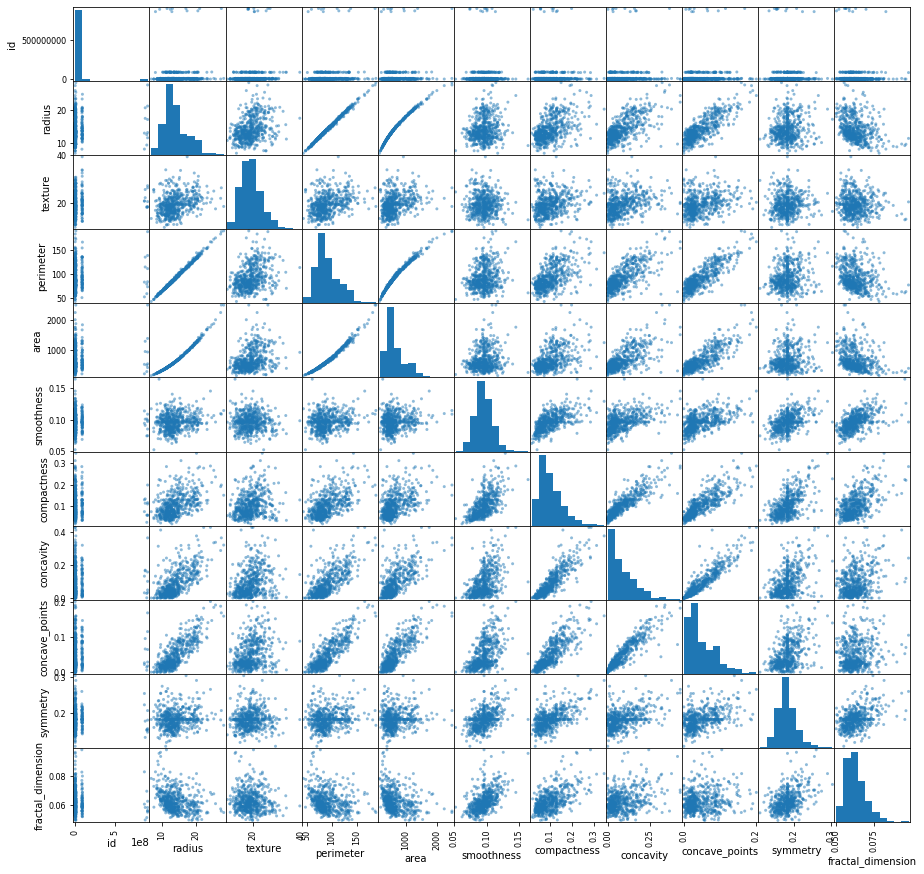

In [107]:
pd.plotting.scatter_matrix(df_means, figsize=(15,15));

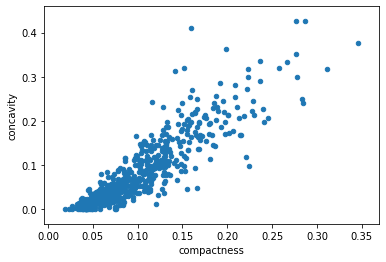

In [109]:
df_means.plot(x='compactness', y = 'concavity', kind = 'scatter');

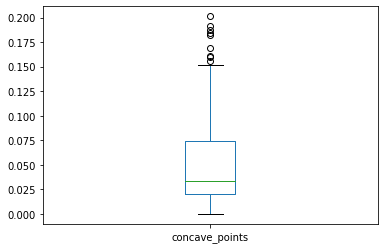

In [111]:
# box plot
df_means['concave_points'].plot(kind='box');

## EDA

In [114]:
# Question: Compare size of tumors for benign and malignant
# create 2 dataframes for each benign and malignant
df_b = df_means.query("diagnosis == 'B'")
df_b.shape

(354, 12)

In [115]:
df_m = df_means.query("diagnosis == 'M'")
df_m.shape

(210, 12)

In [116]:
# check rows count
df_means.shape[0] == df_b.shape[0] + df_m.shape[0]

True

In [117]:
# check summary statistics to compare mean of tumor
df_b.describe() 

,id,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
count,3.540000e+02,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,2.673919e+07,12.144799,17.903038,78.066073,462.712429,0.092516,0.080192,0.046045,0.025718,0.174695,0.062871
std,1.172148e+08,1.787007,3.919033,11.849575,134.769158,0.012790,0.033830,0.043507,0.015937,0.023688,0.006772
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850
25%,8.747062e+05,11.065000,15.180000,70.810000,374.975000,0.083865,0.055668,0.020345,0.015025,0.159050,0.058522
50%,9.090680e+05,12.195000,17.470000,78.225000,458.150000,0.092930,0.075355,0.036985,0.023435,0.176000,0.061510
75%,8.812818e+06,13.377500,19.520000,86.205000,551.550000,0.099687,0.097573,0.059963,0.032473,0.186875,0.065755
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750


In [118]:
df_m.describe() 

,id,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
count,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,3.712319e+07,17.450524,21.589888,115.294667,976.582857,0.102132,0.145771,0.160959,0.088158,0.192176,0.062769
std,1.385185e+08,3.183146,3.708595,21.658705,365.494289,0.011995,0.053431,0.073170,0.033593,0.026878,0.007571
min,8.670000e+03,10.950000,11.890000,71.900000,361.600000,0.073710,0.046050,0.023980,0.027040,0.130800,0.049960
25%,8.597835e+05,15.085000,19.275801,98.815000,706.850000,0.094445,0.110225,0.110575,0.064622,0.176925,0.056648
50%,8.948590e+05,17.325000,21.405000,114.200000,932.000000,0.100450,0.133200,0.151350,0.086280,0.185400,0.061715
75%,8.911543e+06,19.580000,23.545000,129.850000,1200.750000,0.109550,0.171425,0.201775,0.102625,0.208650,0.067285
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440


In [119]:
print("The mean are of malignant is {}, while that of Benign is {}".format(df_m['area'].mean(), df_b['area'].mean()))

The mean are of malignant is 976.5828571428573, while that of Benign is 462.7124293785311


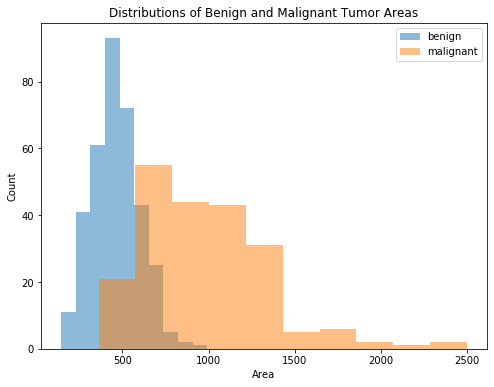

In [120]:
# Plot histogram of benign and malignant tumor areas on the same axes
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_b['area'], alpha=0.5, label='benign')
ax.hist(df_m['area'], alpha=0.5, label='malignant')
ax.set_title('Distributions of Benign and Malignant Tumor Areas')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()